<a href="https://colab.research.google.com/github/darkxenios/MachineLearninghomework/blob/main/%D0%B4%D0%B72%20%D0%96%D1%83%D0%BA%D0%BE%D0%B2%D0%B0%20%D0%9A.%D0%98.%20%D0%B4%D0%B5%D0%B4%D0%BB%D0%B0%D0%B9%D0%BD%202%20%D0%BD%D0%BE%D1%8F%D0%B1%D1%80%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import warnings
warnings.filterwarnings('ignore')

## Black Friday Sales EDA


Розничная компания ABC Private Limited хочет понять покупательское поведение клиентов. Они поделились сводкой покупок различных клиентов для избранных крупных партий продуктов за последний месяц.
Набор данных также содержит демографические данные клиентов (возраст, пол, семейное положение, тип города, город пребывания), сведения о продукте (идентификатор продукта и категория продукта) и общую сумму покупок за последний месяц. По признакам нужно решить кто совершил покупку мужчина или женщина. Это задача классификации.

# Загрузка данных

In [327]:
url = "https://raw.githubusercontent.com/darkxenios/MachineLearninghomework/refs/heads/main/train.csv"
data_raw = pd.read_csv(url)

Вывод количества строк и столбцов

In [328]:
data_raw.shape

(550068, 12)

In [329]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [330]:
data_raw.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [331]:
data_raw.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [332]:
print(data_raw.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


Мы видим, что столбцы (признаки) имеют имена:
* User_ID    Пользовательский ID
* Product_ID   ID товара
* Gender    Пол пользователя
* Age   Возраст
* Occupation    Занятие (Спрятано)
* City_Category    Тип населенного пункта (A,B,C)
* Stay_In_Current_City_Years    кол-во лет в данном городе
* Marital_Status    Семейное положение
* Product_Category_1    Продуктовая категория  (Masked)
* Product_Category_2    Другая продуктовая категория (Masked)
* Product_Category_3    Ещё одна продуктовая категория (Masked)
* Purchase стоимость покупки (Целевая переменная)


In [333]:
data_raw.index

RangeIndex(start=0, stop=550068, step=1)

In [334]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [335]:
data_raw[categorical_columns].count(axis = 0)

,0
Product_ID,550068
Gender,550068
Age,550068
City_Category,550068
Stay_In_Current_City_Years,550068


In [336]:
data_raw[numerical_columns].count(axis = 0)

,0
User_ID,550068
Occupation,550068
Marital_Status,550068
Product_Category_1,550068
Product_Category_2,376430
Product_Category_3,166821
Purchase,550068


In [337]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Обработка категориальных значений

Некоторые столбцы содержат категориальные признаки. Необходимо заменить их тип на специальный, предназначенный для хранения категориальных значений.

In [338]:
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['City_Category'] = data_raw['City_Category'].astype('category')
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('category')

In [339]:
data_raw['Marital_Status'] = data_raw['Marital_Status'].astype('category')

In [340]:
data_raw['Marital_Status'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [341]:
data_raw['Gender'].astype('category')


,Gender
0,F
1,F
2,F
3,F
4,M
...,...
550063,M
550064,F
550065,F
550066,F


In [342]:
data_raw['Age'].dtype

CategoricalDtype(categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=False, categories_dtype=object)

In [343]:
data_raw['City_Category'].dtype

CategoricalDtype(categories=['A', 'B', 'C'], ordered=False, categories_dtype=object)

In [344]:

data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].replace("Free", np.nan , regex=True)
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].apply(lambda v: float(str(v).replace("+","")))
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('float')
data_raw['Stay_In_Current_City_Years'].dtype

dtype('float64')

# Боремся с выбросами

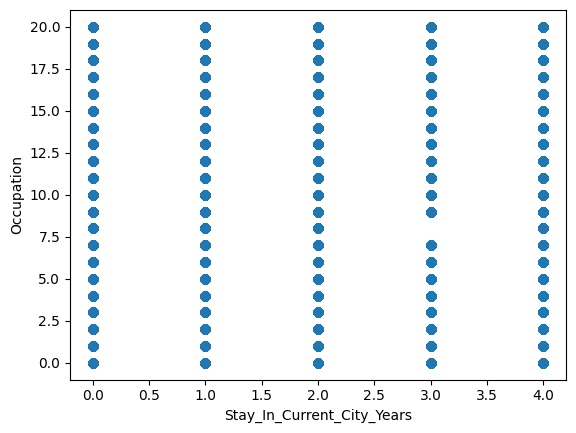

In [109]:
plt.scatter(data_raw['Stay_In_Current_City_Years'], data_raw['Occupation'], alpha=1)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Occupation')
pass

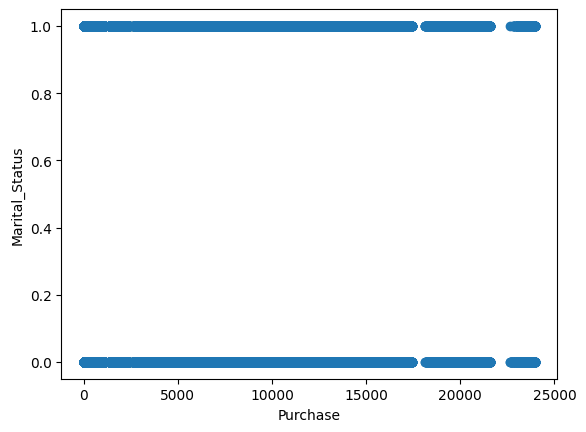

In [110]:

plt.scatter(data_raw['Purchase'], data_raw['Marital_Status'], alpha=1)
plt.xlabel('Purchase')
plt.ylabel('Marital_Status')
pass

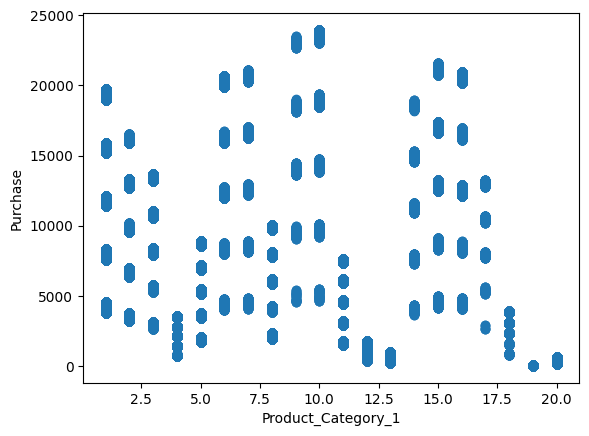

In [111]:

plt.scatter(data_raw['Product_Category_1'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
pass

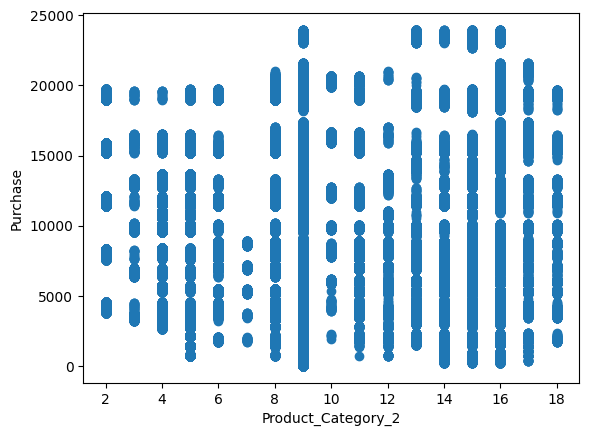

In [112]:

plt.scatter(data_raw['Product_Category_2'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
pass

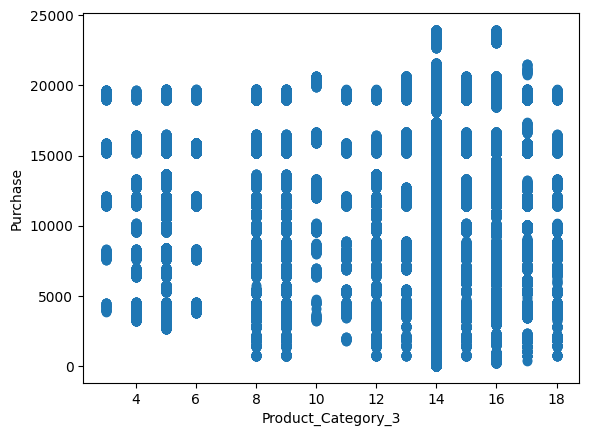

In [ ]:

plt.scatter(data_raw['Product_Category_3'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_3')
plt.ylabel('Purchase')
pass

Находим квантили для этих признаков.

In [22]:
data_raw['Purchase'].quantile([.1,.5,.70, .90, .95, .999, 1])

,Purchase
0.100,3540.0
0.500,8047.0
0.700,11528.0
0.900,16317.0
0.950,19336.0
0.999,23729.0
1.000,23961.0


In [23]:
data_raw['Product_Category_1'].quantile([.1,.5,.70, .90, .95, .999, 1])

,Product_Category_1
0.100,1.0
0.500,5.0
0.700,8.0
0.900,11.0
0.950,13.0
0.999,20.0
1.000,20.0


In [24]:
data_raw['Product_Category_2'].quantile([.1,.5,.70, .90, .95, .999, 1])

,Product_Category_2
0.100,4.0
0.500,9.0
0.700,12.0
0.900,16.0
0.950,16.0
0.999,18.0
1.000,18.0


In [25]:
data_raw['Product_Category_3'].quantile([.1,.5,.70, .90, .95, .999, 1])

,Product_Category_3
0.100,12.0
0.500,14.0
0.700,14.0
0.900,15.0
0.950,16.0
0.999,18.0
1.000,18.0


In [345]:
rows_to_drop = data_raw[
    (data_raw['Product_Category_1'] > data_raw['Product_Category_1'].quantile(0.995)) |
    (data_raw['Product_Category_2'] > data_raw['Product_Category_2'].quantile(0.995)) |
    (data_raw['Product_Category_3']  > data_raw['Product_Category_3' ].quantile(0.995))|
    (data_raw['Purchase']  > data_raw['Purchase' ].quantile(0.995))].index

data1 = data_raw.drop(rows_to_drop)
data1.shape

(544768, 12)

# Визуальная и описательная статистика

In [303]:
data1.describe()


,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,374132.000000,166180.000000,544768.000000
mean,1.003028e+06,8.074090,5.309216,9.813480,12.655350,9235.304572
std,1.727278e+03,6.522524,3.805348,5.087768,4.128044,4911.594911
min,1.000001e+06,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5.000000,9.000000,5840.000000
50%,1.003075e+06,7.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,8.000000,15.000000,16.000000,12029.000000
max,1.006040e+06,20.000000,19.000000,18.000000,18.000000,21352.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и максимальное значения, медиана и значения квартилей.

In [206]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544768 entries, 0 to 550059
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     544768 non-null  int64   
 1   Product_ID                  544768 non-null  object  
 2   Gender                      544768 non-null  object  
 3   Age                         544768 non-null  category
 4   Occupation                  544768 non-null  int64   
 5   City_Category               544768 non-null  category
 6   Stay_In_Current_City_Years  544768 non-null  float64 
 7   Marital_Status              544768 non-null  category
 8   Product_Category_1          544768 non-null  int64   
 9   Product_Category_2          544768 non-null  float64 
 10  Product_Category_3          544768 non-null  float64 
 11  Purchase                    544768 non-null  int64   
dtypes: category(3), float64(3), int64(4), object(2)
memory usage: 4

In [116]:
data1.describe(include=['category'])

,Gender,Age,City_Category
count,544768,544768,544768
unique,2,7,3
top,M,26-35,B
freq,410285,217734,229334


In [346]:
corr_matrix = data1[numerical_columns].corr()
corr_matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.024150,0.020452,0.003668,0.001179,0.003432,0.004251
Occupation,-0.024150,1.000000,0.024150,-0.008762,-0.000682,0.013087,0.020662
Marital_Status,0.020452,0.024150,1.000000,0.019916,0.014810,0.019194,-0.001321
Product_Category_1,0.003668,-0.008762,0.019916,1.000000,0.537271,0.224602,-0.354346
Product_Category_2,0.001179,-0.000682,0.014810,0.537271,1.000000,0.542036,-0.229619
Product_Category_3,0.003432,0.013087,0.019194,0.224602,0.542036,1.000000,-0.029615
Purchase,0.004251,0.020662,-0.001321,-0.354346,-0.229619,-0.029615,1.000000


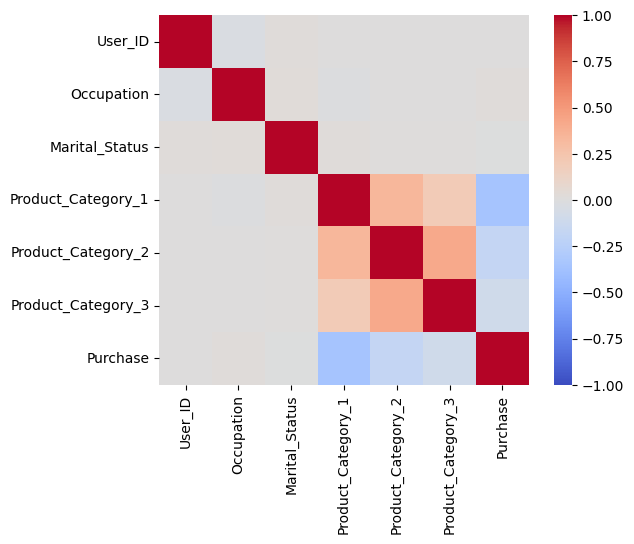

In [118]:
corr_mat = data1[numerical_columns].corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

In [119]:
data1['Gender'].value_counts()

,count
Gender,
M,410285
F,134483


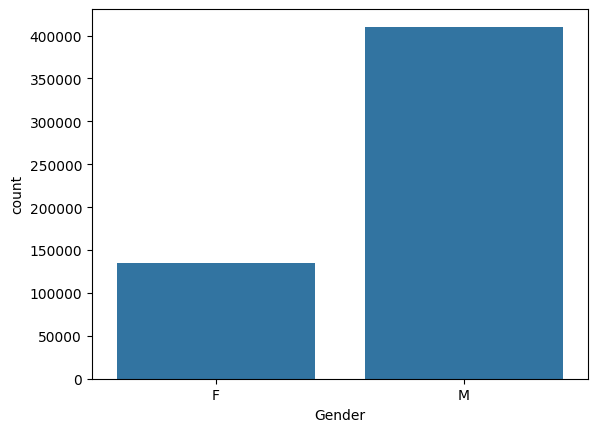

In [78]:
sns.countplot(x='Gender', data=data1)
pass

In [79]:
data1['Gender'].value_counts()

,count
Gender,
M,410285
F,134483


In [35]:
new_data=data1.groupby('User_ID')

In [36]:
new_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,9.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,9.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4.0,0,8,9.0,14.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
481655,1002111,P00120142,M,55+,13,C,4.0,1,5,9.0,14.0,6961
502348,1005391,P00084842,M,26-35,7,A,0.0,0,8,16.0,14.0,7873
502349,1005391,P00302042,M,26-35,7,A,0.0,0,5,9.0,14.0,1855
510699,1000708,P00116842,M,26-35,0,C,2.0,0,2,5.0,8.0,9685


In [37]:
new=new_data['Gender'].unique()

In [38]:
new.value_counts()


,count
Gender,
"['M'] Categories (2, object): ['F', 'M']",4225
"['F'] Categories (2, object): ['F', 'M']",1666


Мы посчитали уникальных пользователей и видим, что мужчин совершивших покупок в этом месяце значительно больше.

# Обработка пропущенных значений

In [347]:
data1.isna().sum()


,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,170636


In [352]:

data_raw['Product_Category_2'] = data_raw['Product_Category_2'].fillna(0)
data_raw['Product_Category_3'] = data_raw['Product_Category_3'].fillna(0)


In [121]:
data1.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000
mean,1.003028e+06,8.074090,1.858569,0.409433,5.309216,9.558676,13.589818,9235.304572
std,1.727278e+03,6.522524,1.289540,0.491730,3.805348,4.233170,2.362523,4911.594911
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,14.000000,5840.000000
50%,1.003075e+06,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,14.000000,12029.000000
max,1.006040e+06,20.000000,4.000000,1.000000,19.000000,18.000000,18.000000,21352.000000


# Векторизация

Поработаем над бинарным признаком Gender

In [349]:
data1.describe(include=['category'])


,Age,City_Category,Marital_Status
count,544768,544768,544768
unique,7,3,2
top,26-35,B,0
freq,217734,229334,321722


In [350]:
data1['Gender'] = data1['Gender'].astype('object')

data1.loc[(data1['Gender'] == 'F'), 'Gender'] = 0
data1.loc[(data1['Gender'] == 'M'), 'Gender'] = 1

In [353]:
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2.0,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2.0,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4.0,0,8,NaN,NaN,7969


Применим метод векторизации к небинарным признакам.

In [354]:
data1['City_Category'].unique()
city_dummies = pd.get_dummies(data1['City_Category'])
city_dummies.head()

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [355]:
data1['Occupation'].unique()
occup_dummies = pd.get_dummies(data1['Occupation'])
occup_dummies.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [356]:
data1['Age'].unique()
age_dummies = pd.get_dummies(data1['Age'])
age_dummies.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True


In [357]:

data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544768 entries, 0 to 550059
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     544768 non-null  int64   
 1   Product_ID                  544768 non-null  object  
 2   Gender                      544768 non-null  object  
 3   Age                         544768 non-null  category
 4   Occupation                  544768 non-null  int64   
 5   City_Category               544768 non-null  category
 6   Stay_In_Current_City_Years  544768 non-null  float64 
 7   Marital_Status              544768 non-null  category
 8   Product_Category_1          544768 non-null  int64   
 9   Product_Category_2          374132 non-null  float64 
 10  Product_Category_3          166180 non-null  float64 
 11  Purchase                    544768 non-null  int64   
dtypes: category(3), float64(3), int64(4), object(2)
memory usage: 4

In [358]:
data1 = pd.concat((data1, city_dummies), axis = 1)
data1 = pd.concat((data1, age_dummies), axis = 1)
data1 = pd.concat((data1, occup_dummies), axis = 1)
data1 = data1.drop(['City_Category'], axis = 1)

data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,0,0-17,10,2.0,0,3,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,1000001,P00248942,0,0-17,10,2.0,0,1,6.0,14.0,...,False,False,False,False,False,False,False,False,False,False
2,1000001,P00087842,0,0-17,10,2.0,0,12,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,1000001,P00085442,0,0-17,10,2.0,0,12,14.0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,1000002,P00285442,1,55+,16,4.0,0,8,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False


In [359]:

data1 = data1.drop(['Age'], axis = 1)
data1.head()

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,0,10,2.0,0,3,NaN,NaN,8370,...,False,False,False,False,False,False,False,False,False,False
1,1000001,P00248942,0,10,2.0,0,1,6.0,14.0,15200,...,False,False,False,False,False,False,False,False,False,False
2,1000001,P00087842,0,10,2.0,0,12,NaN,NaN,1422,...,False,False,False,False,False,False,False,False,False,False
3,1000001,P00085442,0,10,2.0,0,12,14.0,NaN,1057,...,False,False,False,False,False,False,False,False,False,False
4,1000002,P00285442,1,16,4.0,0,8,NaN,NaN,7969,...,False,False,False,False,False,True,False,False,False,False


In [360]:
data1=data1.drop(['Product_ID'], axis = 1)



In [ ]:
data1=data1.drop(['Product_ID'], axis = 1)

In [363]:
data1= data1.drop(["Occupation"], axis = 1)

In [362]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 544768 entries, 0 to 550059
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      544768 non-null  object  
 1   Occupation                  544768 non-null  int64   
 2   Stay_In_Current_City_Years  544768 non-null  float64 
 3   Marital_Status              544768 non-null  category
 4   Product_Category_1          544768 non-null  int64   
 5   Product_Category_2          374132 non-null  float64 
 6   Product_Category_3          166180 non-null  float64 
 7   Purchase                    544768 non-null  int64   
 8   A                           544768 non-null  bool    
 9   B                           544768 non-null  bool    
 10  C                           544768 non-null  bool    
 11  0-17                        544768 non-null  bool    
 12  18-25                       544768 non-null  bool    
 13  26-3

In [364]:
data1.isna().sum()

,0
Gender,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,170636
Product_Category_3,378588
Purchase,0
A,0
B,0
C,0


In [366]:
data1['Product_Category_2'] = data1['Product_Category_2'].fillna(0)
data1['Product_Category_3'] = data1['Product_Category_3'].fillna(0)

In [367]:
data1.isna().sum()

,0
Gender,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,0
A,0
B,0
C,0


# Обучение

выбор обучающей и тестовой выборки

In [368]:
X = data1.drop('Gender', axis = 1)
y = data1['Gender']
feature_names = X.columns

In [369]:

feature_names

Index(['Stay_In_Current_City_Years',             'Marital_Status',
               'Product_Category_1',         'Product_Category_2',
               'Product_Category_3',                   'Purchase',
                                'A',                          'B',
                                'C',                       '0-17',
                            '18-25',                      '26-35',
                            '36-45',                      '46-50',
                            '51-55',                        '55+',
                                  0,                            1,
                                  2,                            3,
                                  4,                            5,
                                  6,                            7,
                                  8,                            9,
                                 10,                           11,
                                 12,                          

In [370]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [371]:
y = np.array(y, dtype='int')
y

array([0, 0, 0, ..., 1, 1, 0])

Проверка на совпадение размерности массивов для работы с ними

разобьем данные на обучающую и тестовую выборки. За обучающую возьмем 0.75 данных, за тестовую 0,25

In [372]:
print(X.shape)
print(y.shape)
N, d = X.shape

(544768, 37)
(544768,)


In [373]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

408576 136192


 **kNN - метод ближайших соседей**


In [374]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [375]:
model = KNeighborsClassifier(n_neighbors=7, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Ошибка на train: {round((1 - model.score(X_train, y_train)) * 100, 2)}%')
print(f'Ошибка на test: {round((1 - model.score(X_test, y_test)) * 100, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.11      0.16     33744
           1       0.76      0.92      0.83    102448

    accuracy                           0.72    136192
   macro avg       0.54      0.52      0.50    136192
weighted avg       0.65      0.72      0.67    136192

Confusion Matrix:
 [[ 3738 30006]
 [ 7945 94503]]
Ошибка на train: 22.58%
Ошибка на test: 27.87%


10 соседей

In [376]:
knn = KNeighborsClassifier(n_neighbors = 10, p=2)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.28475240836466165

13 соседей

In [377]:
knn = KNeighborsClassifier(n_neighbors = 13, p=2)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.26154252819548873

**Random Forest**

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

In [ ]:
np.sum(rf.feature_importances_)

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


In [ ]:


d_first = 10
plt.title("Вклад каждого пункта опроса:")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'red')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-5, d_first+5])